In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random

In [33]:
image = cv.imread('house.jpg', 0)
size = image.shape
cv.imshow("Original", image)
# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv.waitKey(0)
  
# closing all open windows
cv.destroyAllWindows()

In [34]:
# Thực hiện thuật toán đảo ngược theo công thức
# Giá trị điểm ảnh mới = 255 – Giá trị điểm ảnh cũ
new_image = 255 - image
cv.imshow("255-image", new_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [35]:
# Áp dụng bộ lọc Gaussian để làm mờ ảnh
blur = cv.GaussianBlur(image,(3,3),0)
cv.imshow("GaussianBlur", blur)
cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
# Áp dụng bộ lọc trung vị để lọc nhiễu muối tiêu
# Adding salt and pepper noise
# salt-and-pepper noise can be applied only to grayscale images
# Getting the dimensions of the image

noise_image = cv.imread('house.jpg', 0)
row , col = noise_image.shape
# Randomly pick some pixels in the image for coloring them white
# Pick a random number between 300 and 10000
#number_of_pixels = random.randint(5000, 10000)
number_of_pixels = int(row * col / 10)
for i in range(number_of_pixels):
    
    # Pick a random y coordinate
    y_coord=random.randint(0, row - 1)
        
    # Pick a random x coordinate
    x_coord=random.randint(0, col - 1)
        
    # Color that pixel to white
    noise_image[y_coord][x_coord] = 255
        
# Randomly pick some pixels in # the image for coloring them black
# Pick a random number between 300 and 10000
#number_of_pixels = random.randint(5000, 10000)
for i in range(number_of_pixels):
    
    # Pick a random y coordinate
    y_coord=random.randint(0, row - 1)
        
    # Pick a random x coordinate
    x_coord=random.randint(0, col - 1)
        
    # Color that pixel to black
    noise_image[y_coord][x_coord] = 0

cv.imshow("salt and pepper", noise_image)
cv.waitKey(0)
cv.destroyAllWindows()

median3 = cv.medianBlur(noise_image,3)
median5 = cv.medianBlur(noise_image,5)
median7 = cv.medianBlur(noise_image,7)

In [47]:
# Áp dụng bộ lọc Sobel để phát hiện cạnh trong ảnh
# Blur the image for better edge detection

# Sobel Edge Detection
gray = cv.cvtColor(blur, 1)

sobelx = cv.Sobel(src=gray, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(src=gray, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv.Sobel(src=gray, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv.imshow('Sobel X', sobelx)
cv.waitKey(0)
cv.imshow('Sobel Y', sobely)
cv.waitKey(0)
cv.imshow('Sobel X Y using Sobel() function', sobelxy)
cv.waitKey(0)

cv.destroyAllWindows()

In [48]:
# Áp dụng bộ lọc Laplacian để làm nổi bất các đặc trưng
laplacian = cv.Laplacian(sobelxy, cv.CV_64F)

cv.imshow('Laplacian', laplacian)
cv.waitKey(0)

cv.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Laplacian')

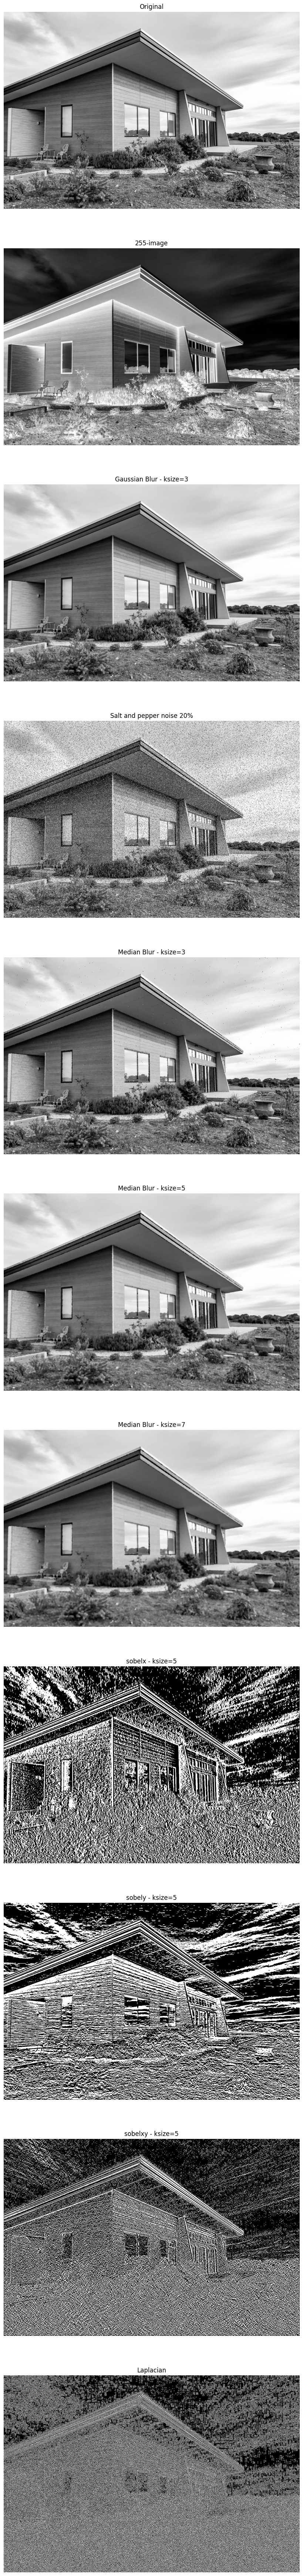

In [49]:
# create figure
fig = plt.figure(figsize=(12, 90))
  
# setting values to rows and column variables
rows = 11
columns = 1

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.title("255-image")

fig.add_subplot(rows, columns, 3)
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.title("Gaussian Blur - ksize=3")

fig.add_subplot(rows, columns, 4)
plt.imshow(noise_image, cmap='gray')
plt.axis('off')
plt.title("Salt and pepper noise 20%")

fig.add_subplot(rows, columns, 5)
plt.imshow(median3, cmap='gray')
plt.axis('off')
plt.title("Median Blur - ksize=3")

fig.add_subplot(rows, columns, 6)
plt.imshow(median5, cmap='gray')
plt.axis('off')
plt.title("Median Blur - ksize=5")

fig.add_subplot(rows, columns, 7)
plt.imshow(median7, cmap='gray')
plt.axis('off')
plt.title("Median Blur - ksize=7")

fig.add_subplot(rows, columns, 8)
plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.title("sobelx - ksize=5")

fig.add_subplot(rows, columns,9)
plt.imshow(sobely, cmap='gray')
plt.axis('off')
plt.title("sobely - ksize=5")

fig.add_subplot(rows, columns, 10)
plt.imshow(sobelxy, cmap='gray')
plt.axis('off')
plt.title("sobelxy - ksize=5")

fig.add_subplot(rows, columns, 11)
plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.title("Laplacian")